In [1]:
import scanpy as sc
import pandas as pd
from matplotlib import pyplot as plt
import os
import numpy as np
from matplotlib import rcParams
import seaborn as sns
import anndata as ad
#import readxl
os.chdir(os.getcwd())


## LOAD ALL .H5 FILES OF THE SAMPLES INTO A DICTIONARY, GROUPED BY THE BATCHES

In [8]:
## Directory holding all data
#base_dir='/Volumes/T7/Plaque_scRNA_data/plaque_aligned_data/'
#base_dir='/home/icb/daniel.garger/Atherosclerosis/aligned_data'
base_dir='/data/gpfs/projects/punim2121/Atherosclerosis/aligned_data'

## Read metadata
metadata=pd.read_excel('/data/gpfs/projects/punim2121/Atherosclerosis/data/Sample_Names_050823.xlsx',
                        sheet_name='metadata',index_col=0) 
metadata['batch']=metadata['batch'].astype(str)                         

## Dict for collecting the h5 files
anndata_dict={}

## Looping over the batch directories and initialising temporary list to collect all anndatas for a given batch
for ref_genome in os.listdir(base_dir):
    if not ref_genome.startswith('.'):
        anndata_dict[ref_genome]={}
        ref_genome_dir=os.path.join(base_dir,ref_genome)

        for batch in os.listdir(ref_genome_dir):
            if not batch.startswith('.'):
                temp_list=[]
                batch_dir=os.path.join(ref_genome_dir,batch)

                ## Loop over all samples in a batch
                for sample_dir in os.listdir(batch_dir):
                    if not sample_dir.startswith('.'):
                        ## Aligned counts are in directories ending with "_count"
                        if 'count' in sample_dir:
                            ## Read H5 file and make variables names unique + add them to the temporary list
                            try:                            
                                sample_h5_fn=(os.path.join(base_dir,ref_genome_dir,batch_dir,sample_dir,'outs','raw_feature_bc_matrix.h5'))
                                adata=sc.read_10x_h5(sample_h5_fn)
                                adata.var_names_make_unique()
                                sample_name=sample_dir.split('_count')[0]
                                adata.obs[['patient','condition','batch']]=metadata.loc[sample_name,['patient','condition','batch']].values
                                temp_list.append(adata)
                                print(sample_dir)
                                print(adata.var.shape)
                            except FileNotFoundError:
                                print(sample_dir, 'Not found!\n')     
                    
                    ## Add all anndata files of a batch to the respective key in the anndata_dict
                    anndata_dict[ref_genome][batch]=temp_list

/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


MUC18257_count
(39583, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


MUC18253_count
(39583, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


MUC18256_count
(39583, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


MUC18255_count
(39583, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


MUC18258_count
(39583, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


MUC18254_count
(39583, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


22L002255_count
(39583, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


22L002260_count
(39583, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


22L002251_count
(39583, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


22L002252_count
(39583, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


22L002259_count
(39583, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


22L002254_count
(39583, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


22L002253_count
(39583, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


22L002256_count
(39583, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


21L006328_count
(39583, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


21L006324_count
(39583, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


21L006320_count
(39583, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


21L006316_count
(39583, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


MUC14317_count
(39583, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


MUC18257_count
(60721, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


MUC18253_count
(60721, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


MUC18256_count
(60721, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


MUC18255_count
(60721, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


MUC18258_count
(60721, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


MUC18254_count
(60721, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


22L002255_count
(60721, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


22L002260_count
(60721, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


22L002251_count
(60721, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


22L002252_count
(60721, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


22L002259_count
(60721, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


22L002254_count
(60721, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


22L002253_count
(60721, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


22L002256_count
(60721, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


21L006328_count
(60721, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


21L006324_count
(60721, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


21L006320_count
(60721, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


21L006316_count
(60721, 3)
MUC14317_count
(60721, 3)


/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1899: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


## CONCATENATE ANNDATA FILES FOR EACH BATCH ANS SAVE THEM AS H5AD FILES 

In [10]:
#base_dir='/Volumes/T7/Plaque_scRNA_data/plaque_aligned_data/'

adata_batch_dict={}
for ref_genome in anndata_dict.keys():
    for batch in anndata_dict[ref_genome].keys():
        adata_batch=ad.concat(anndata_dict[ref_genome][batch],merge='same')
        adata_batch.obs_names_make_unique()

        ## Calculate basic variables for the obs layer
        adata_batch.obs['n_counts']=adata_batch.X.sum(axis=1).A1
        adata_batch=adata_batch[adata_batch.obs['n_counts']>0,:]
        adata_batch.obs['n_genes']=(adata_batch.X>0).sum(axis=1).A1

        ## Calculate ribisomal percentage
        ribo_genes=adata_batch.var_names.str.startswith(("RPS","RPL"))
        adata_batch.obs['ribo_frac'] = np.sum(
            adata_batch[:, ribo_genes].X, axis=1).A1 / np.sum(adata_batch.X, axis=1).A1
        
        ## Calculate mitochondrial percentage
        mito_genes = adata_batch.var_names.str.startswith(("MT"))
        adata_batch.obs['mt_frac'] = np.sum(
            adata_batch[:, mito_genes].X, axis=1).A1 / np.sum(adata_batch.X, axis=1).A1
        
        adata_batch_dict[batch]=adata_batch
        data_fold='/data/gpfs/projects/punim2121/Atherosclerosis/data'
        fname=os.path.join(data_fold,'_'.join([ref_genome,batch,'raw.h5ad']))
        adata_batch.write_h5ad(fname)
        del adata_batch

/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/tmp/ipykernel_241772/2071467505.py:12: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_batch.obs['n_genes']=(adata_batch.X>0).sum(axis=1).A1
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/tmp/ipykernel_241772/2071467505.py:12: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_batch.obs['n_genes']=(adata_batch.X>0).sum(axis=1).A1
/data/gpfs/projects/punim2121/anaconda3/envs/scarches/lib/python3.9/site-packages/anndata/_core/

batch Batch2 min n_count nan
batch Batch4 min n_count nan
batch Batch3 min n_count nan
batch Batch1 min n_count nan


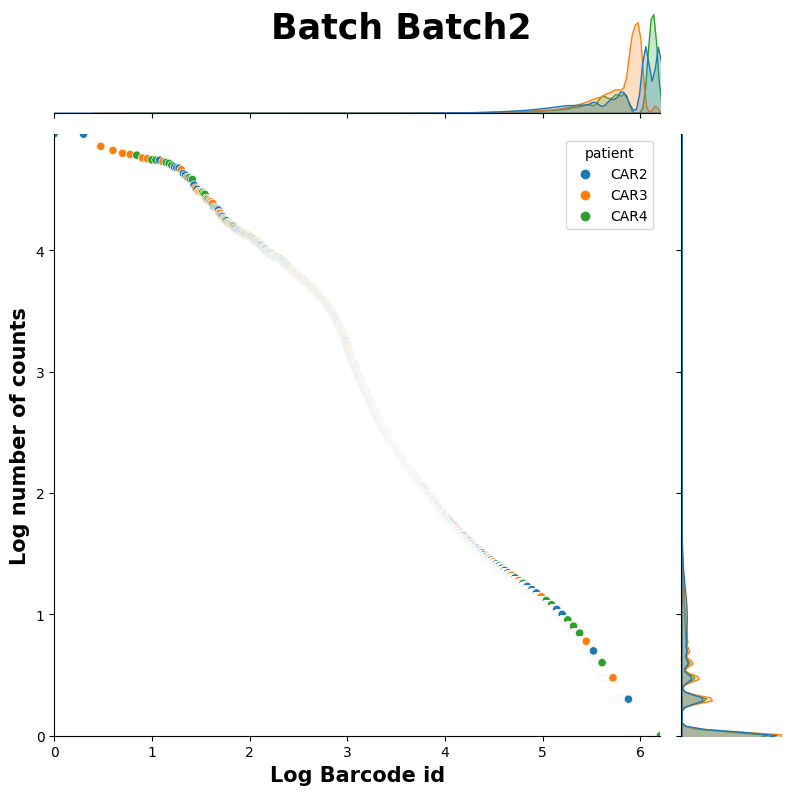

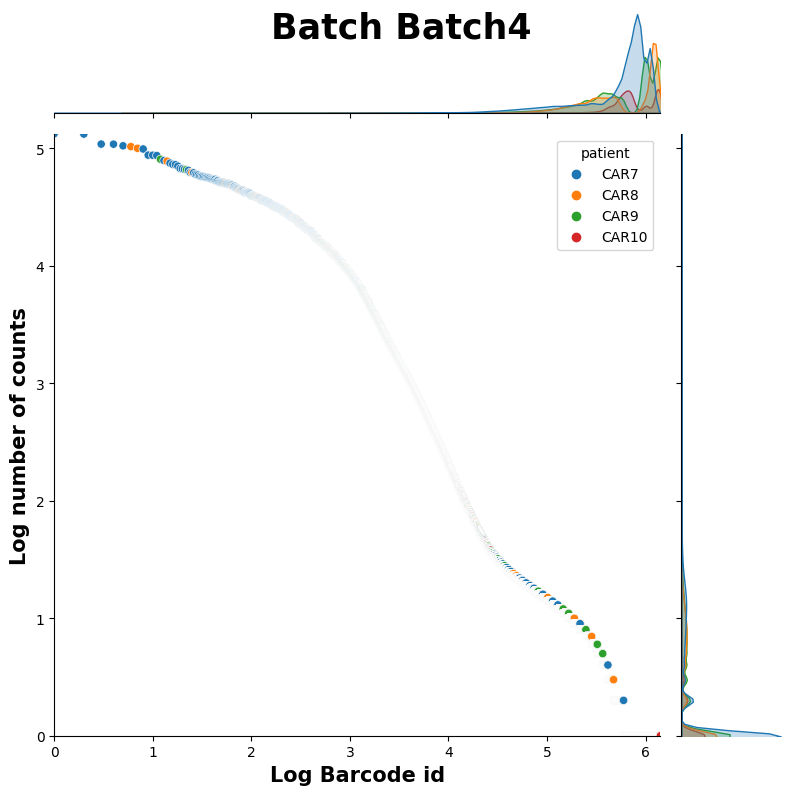

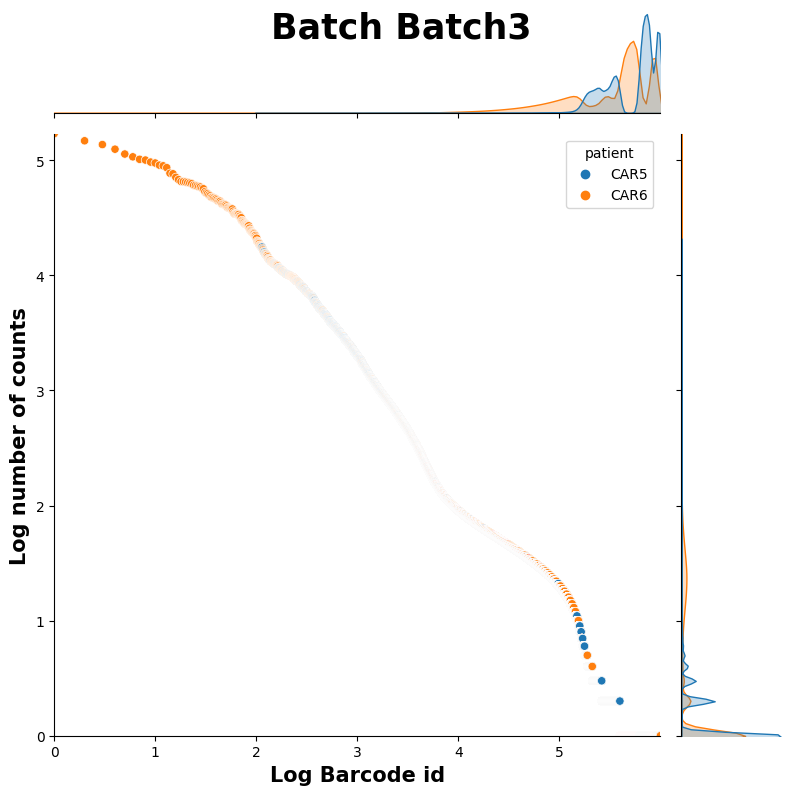

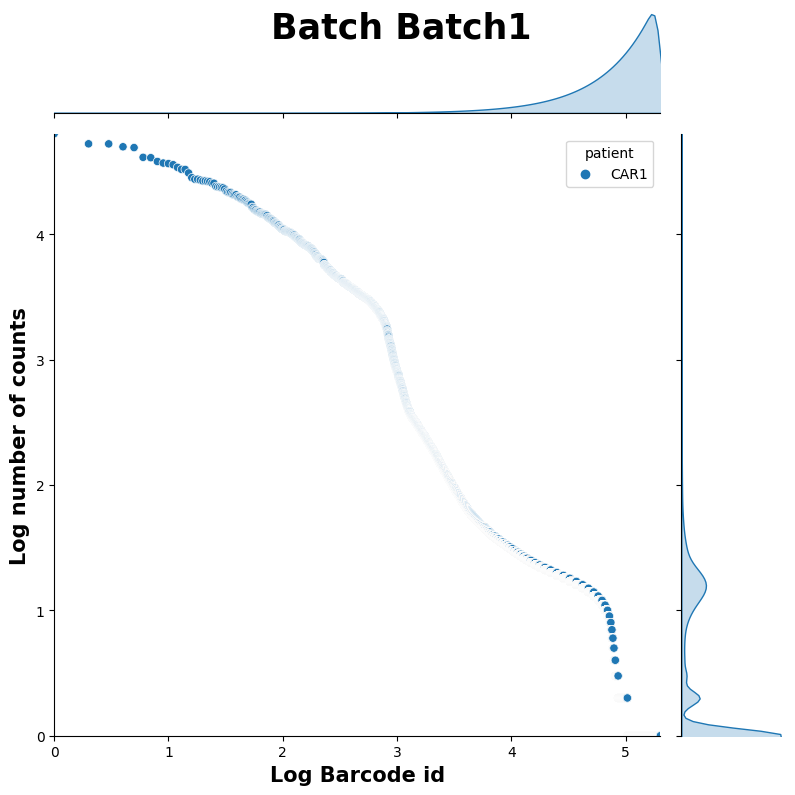

In [4]:
for batch in [*adata_batch_dict][0:]:
    adata_batch=adata_batch_dict[batch]

    plot_df=adata_batch.obs[['n_counts','batch','patient']]
    plot_df=plot_df.sort_values(by='n_counts',ascending=False)
    plot_df['id']=np.arange(1,len(adata_batch.obs)+1)

    batch_plot_df=plot_df.copy()
    print('batch',batch,'min n_count',plot_df[plot_df['batch']==batch]['n_counts'].min())
    batch_plot_df['id']=np.arange(1,len(batch_plot_df)+1)
    batch_plot_df['log_id']=np.log10(batch_plot_df['id'])
    batch_plot_df['log_n_counts']=np.log10(batch_plot_df['n_counts'])
    p=sns.jointplot(data=batch_plot_df,x='log_id',y='log_n_counts',hue='patient',height=8,
                    ylim=(0,batch_plot_df['log_n_counts'].max()),xlim=(batch_plot_df['log_id'].min(),batch_plot_df['log_id'].max()))
    p.fig.suptitle('Batch '+ str(batch),fontsize=25,fontweight='bold')
    # Access the matplotlib axes
    ax=p.ax_joint
    ax.set_ylabel('Log number of counts',fontsize=15,fontweight='bold')
    ax.set_xlabel('Log Barcode id',fontsize=15,fontweight='bold')
    #plt.yscale('log')
    #plt.xscale('log')

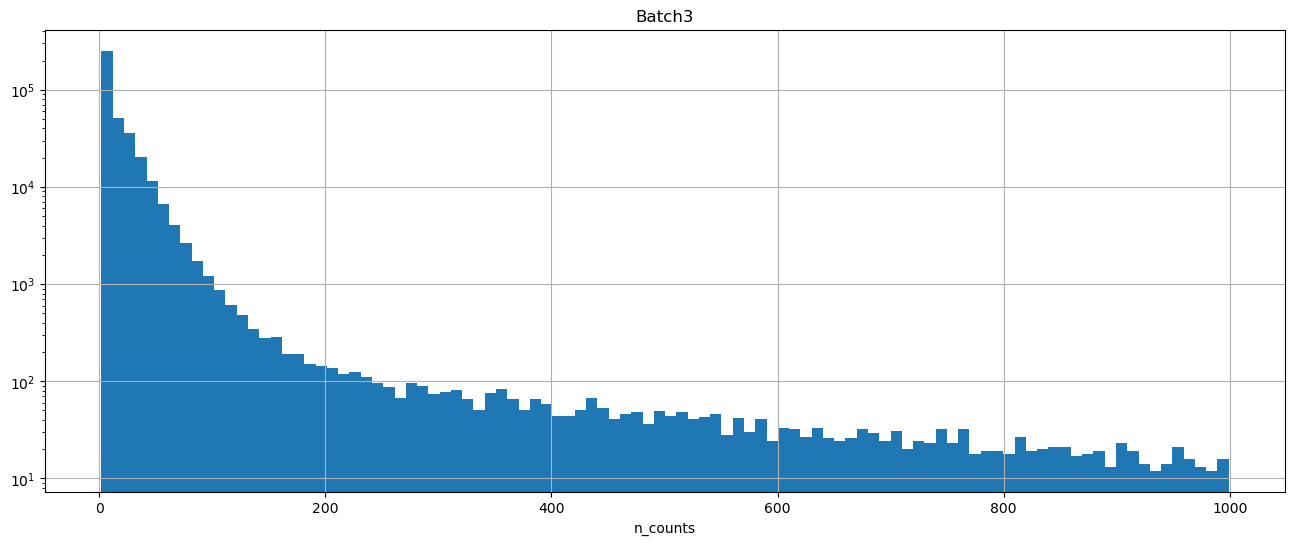

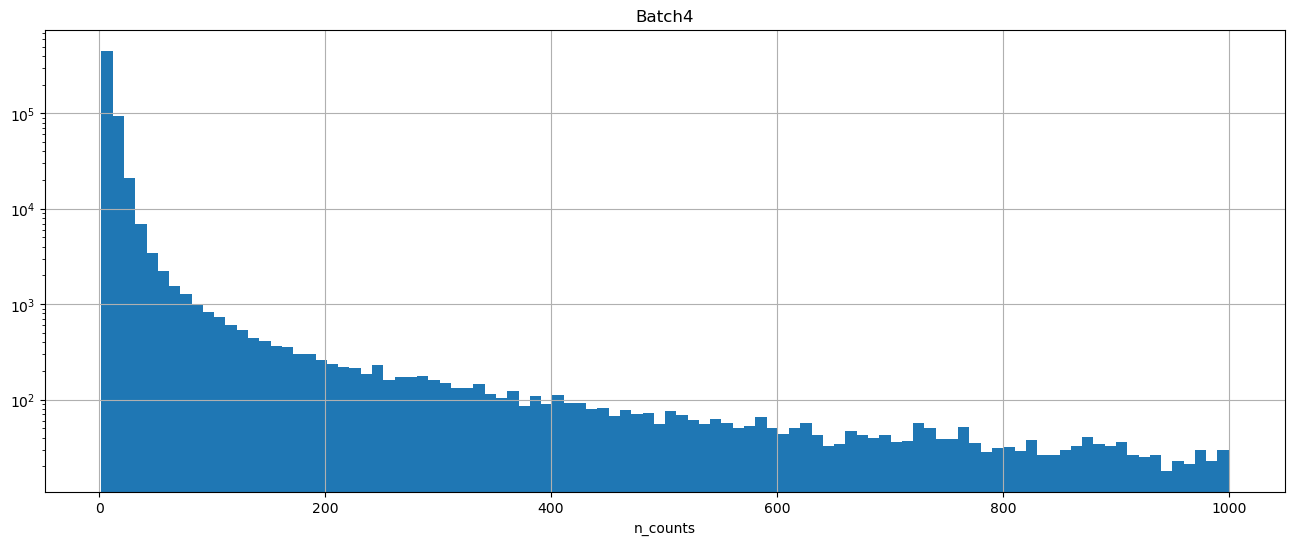

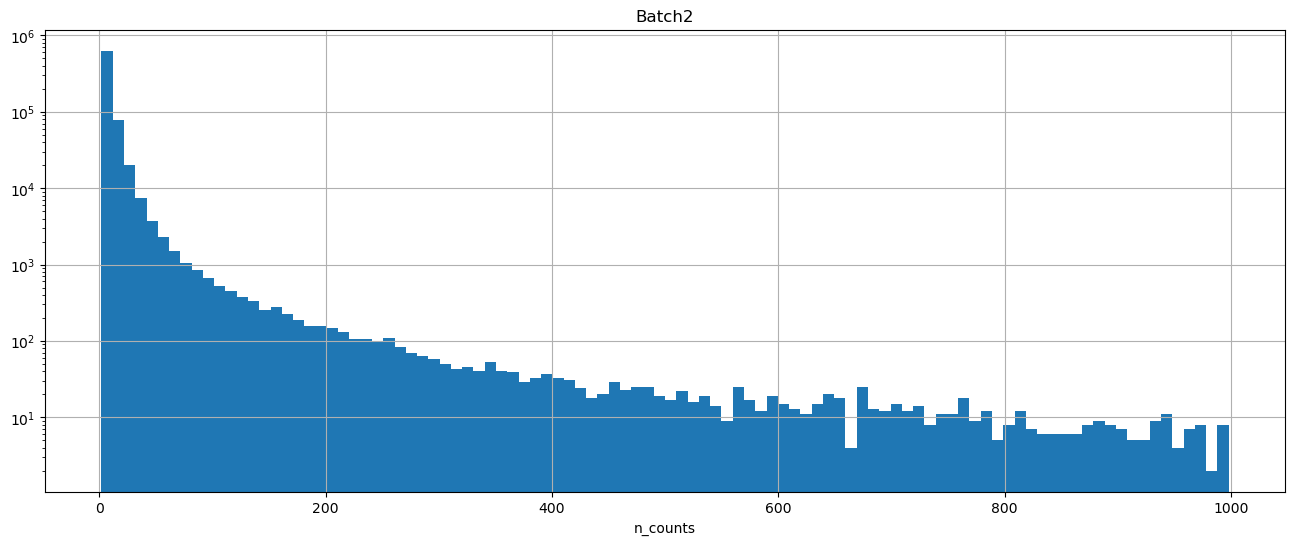

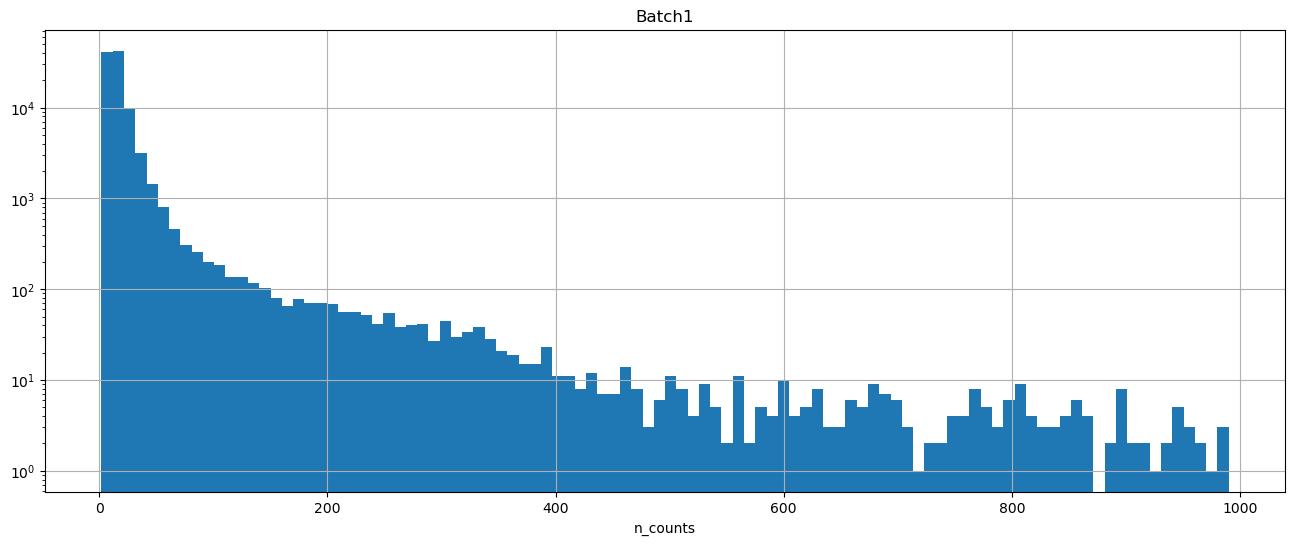

In [35]:
for batch in [*adata_batch_dict][0:]:
    adata_batch=adata_batch_dict[batch]
    fig,ax=plt.subplots(1,1,figsize=(16,6))
    adata_batch.obs['log_n_counts']=np.log10(adata_batch.obs['n_counts'])
    (adata_batch.obs.loc[(adata_batch.obs['n_counts']<=1000)&(adata_batch.obs['n_counts']>1),'n_counts'].hist(ax=ax,bins=100))
    ax.set_yscale('log')
    ax.set_title(batch)
    ax.set_xlabel('n_counts')
    #ax.set_xlim(0,1000)

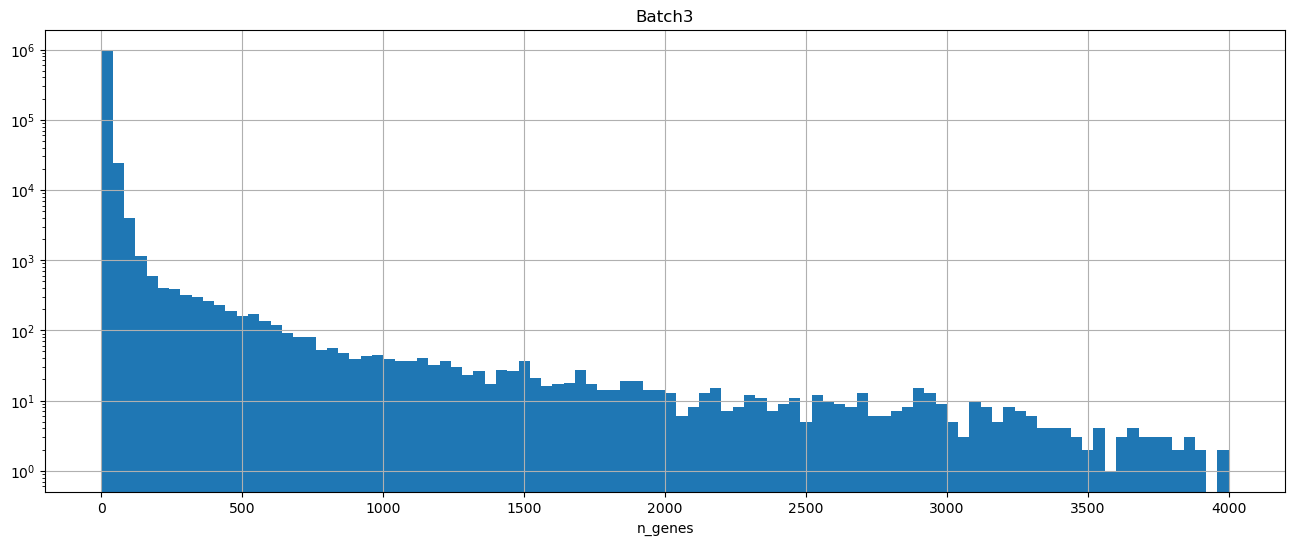

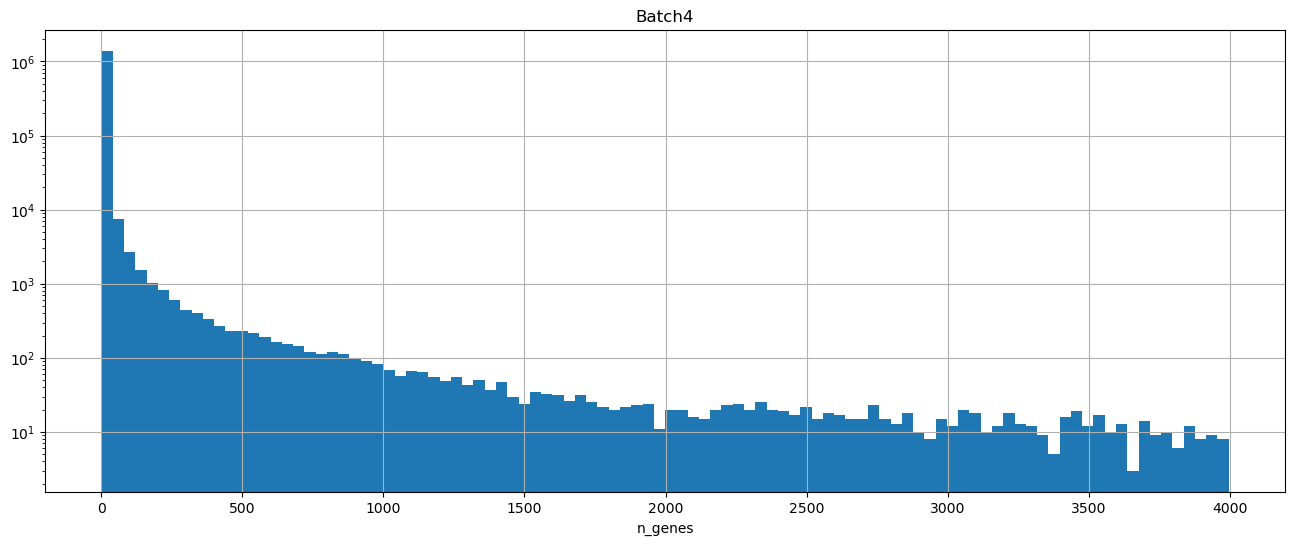

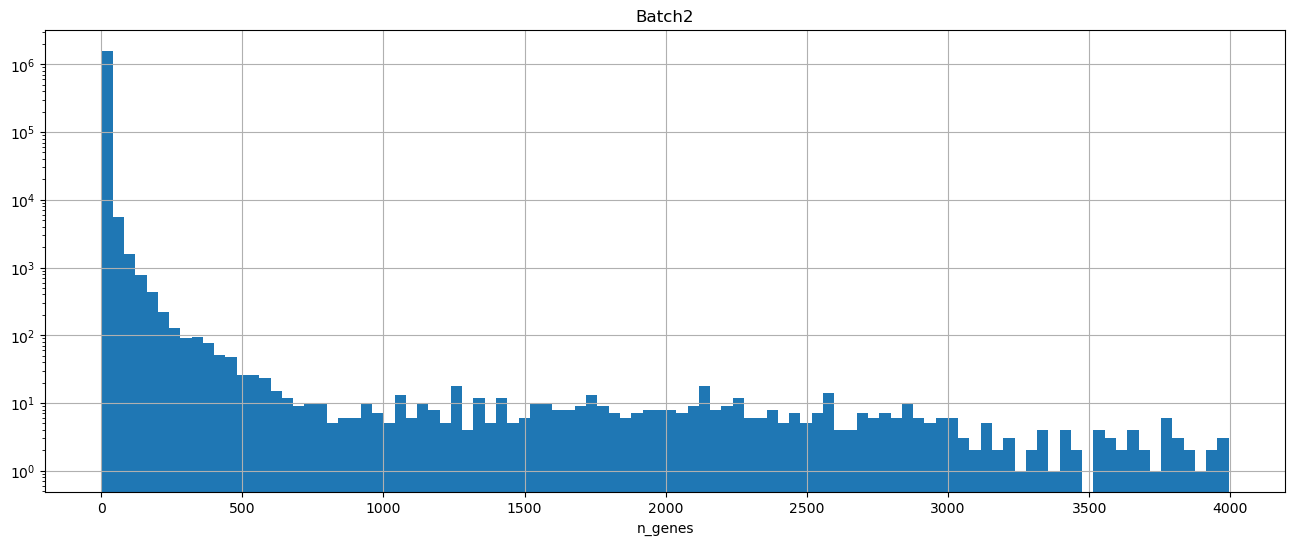

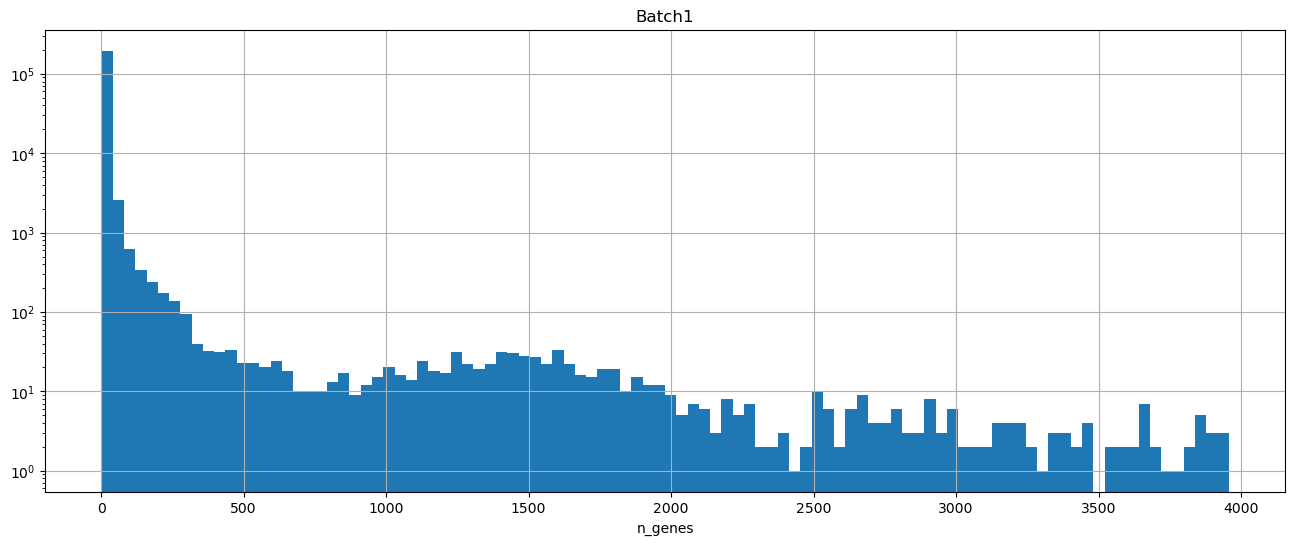

In [36]:
for batch in [*adata_batch_dict][0:]:
    adata_batch=adata_batch_dict[batch]
    fig,ax=plt.subplots(1,1,figsize=(16,6))
    #adata_batch.obs['log_n_counts']=np.log10(adata_batch.obs['n_counts'])
    (adata_batch.obs.loc[(adata_batch.obs['n_genes']<=4000)&(adata_batch.obs['n_genes']>0),'n_genes'].hist(ax=ax,bins=100))
    ax.set_yscale('log')
    ax.set_title(batch)
    ax.set_xlabel('n_genes')

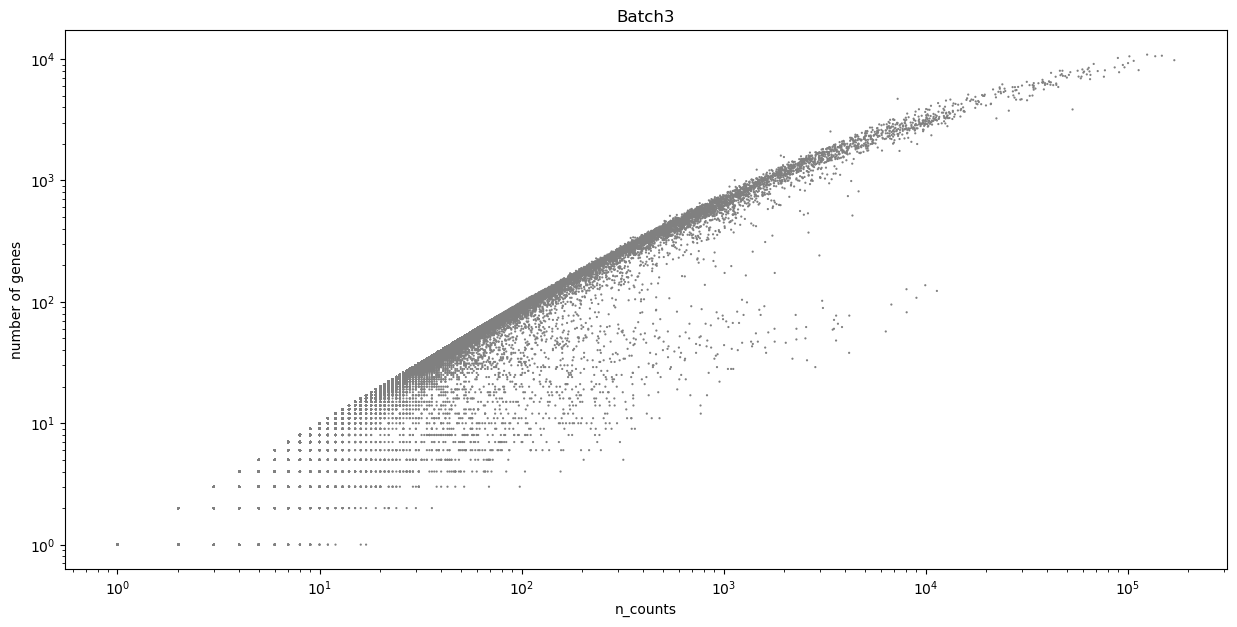

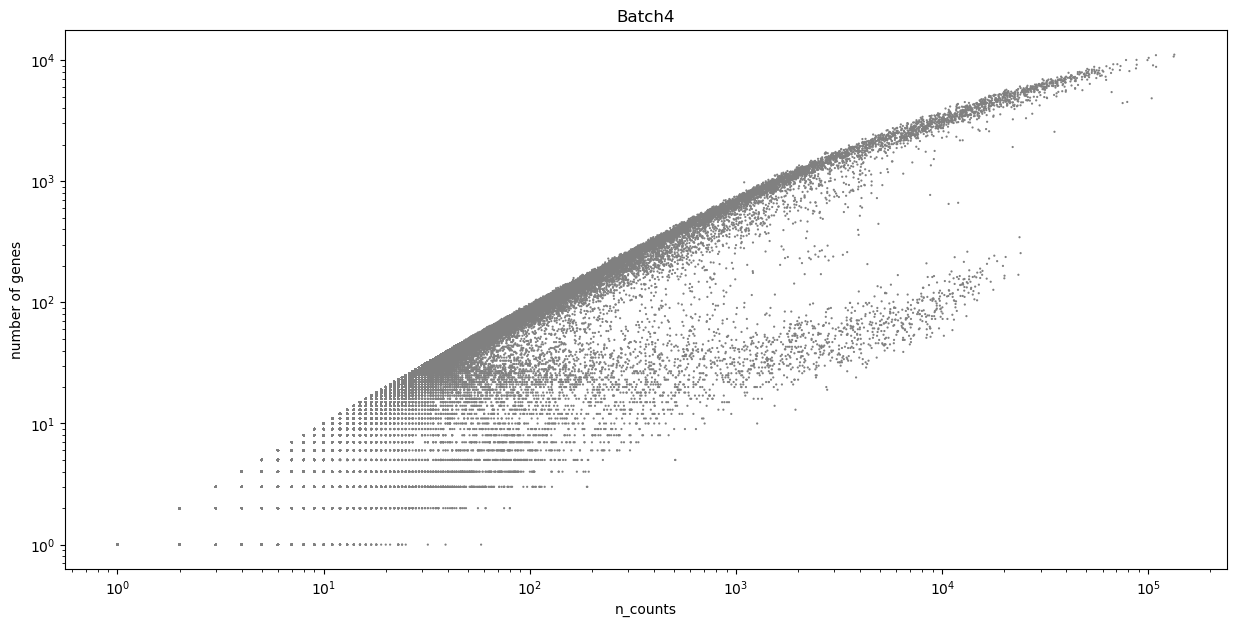

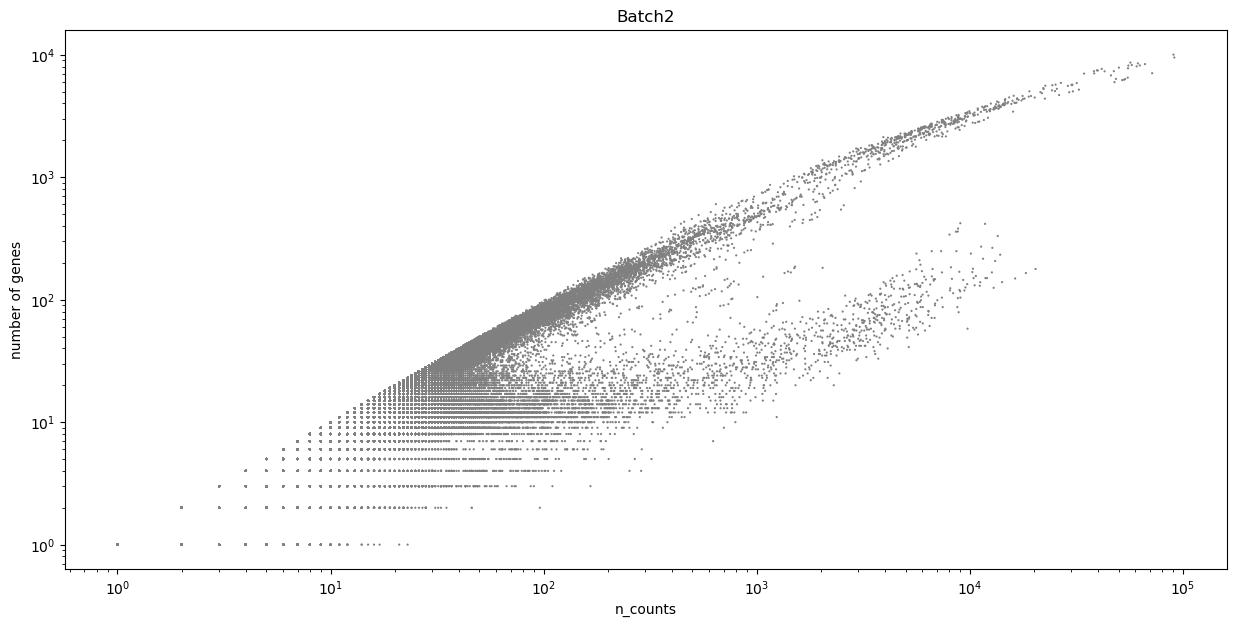

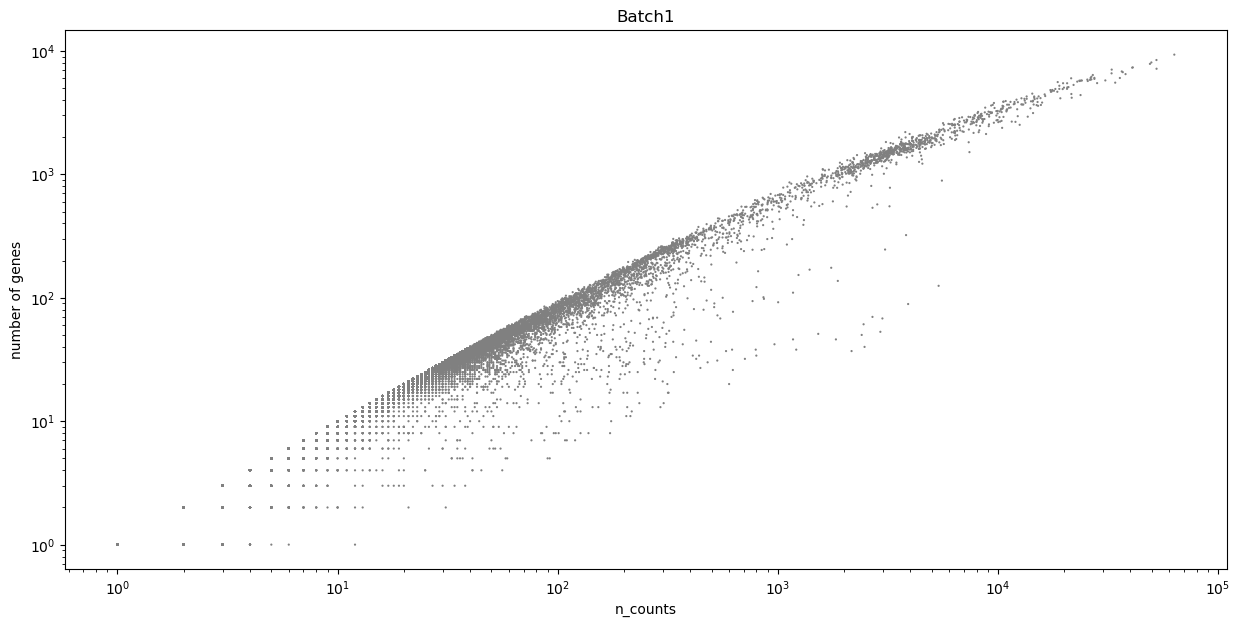

In [37]:
for batch in [*adata_batch_dict][0:]:
    adata_batch=adata_batch_dict[batch]
    rcParams['figure.figsize']=(15, 7)
    fig, ax = plt.subplots()
    sc.pl.scatter(adata_batch, 'n_counts', 'n_genes', size=10, ax=ax, show=False,title=batch)
    ax.set_ylabel('number of genes')
    ax.set_yscale('log')
    ax.set_xscale('log')